In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import statistics
from sklearn import preprocessing
import seaborn as sns

In [33]:
data = pd.read_csv('C:/Users/danii/OneDrive/Презентации аналитика/работа в команде/Data Sample (AIC-1) - Online Retail.csv')

In [34]:
data['UnitPrice'] = [x.replace(',', '.') for x in data['UnitPrice']]
data['UnitPrice'] = pd.to_numeric(data.UnitPrice, downcast = 'float')

low_p = []
medium_p = []
hight_p = []

for x in data['UnitPrice']:
    if x < 50:
        low_p.append(x)
    if 50 < x < 300:
        medium_p.append(x)
    if x > 300:
        hight_p.append(x)
        
'''\
Привести столбец ['UnitPrice'] к типу float.\
Разбить товар по категориям и пометить результаты (цены) в список.\
'''
    

"Привести столбец ['UnitPrice'] к типу float.Разбить товар по категориям и пометить результаты (цены) в список."

In [35]:
def PriceType (row):
    if row['UnitPrice'] in low_p:
            return 'low'
    if row['UnitPrice'] in medium_p:
            return 'medium'
    if row['UnitPrice'] in hight_p:
            return 'high'

In [36]:
data['PriceClass'] = data.apply(PriceType, axis = 1)
'''\
Добавить новый столбец и присвоить категорию стоимости товара (эконом, средней ценовой категории и дорогой).\
'''

'Добавить новый столбец и присвоить категорию стоимости товара (эконом, средней ценовой категории и дорогой).'

'Вывести на график сумму покупок товаров по категориям.'

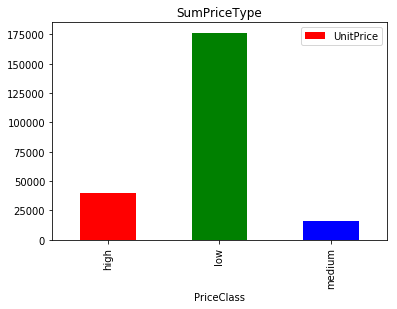

In [37]:
data_Price = data.filter(items = ['UnitPrice', 'PriceClass'])
data_Price.groupby('PriceClass').sum().plot(kind = 'bar', color = 'rgb', title = 'SumPriceType')

'''\
Вывести на график сумму покупок товаров по категориям.\
'''

In [38]:
data_Price.groupby('PriceClass').sum()

,UnitPrice
PriceClass,
high,39918.359375
low,176475.015625
medium,16374.809570


'Количество товаров в абсолютном знечении, купленном клиентами по категориям.'

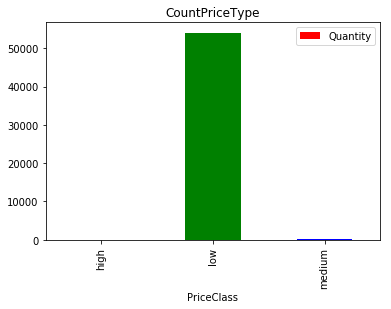

In [39]:
data_Class_Quantity = data.filter(items = ['Quantity', 'PriceClass'])
data_Class_Quantity.groupby('PriceClass').count().plot(kind = 'bar', color = 'rgb', title = 'CountPriceType')

'''\
Количество товаров в абсолютном знечении, купленном клиентами по категориям.\
'''

In [40]:
data_Class_Quantity.groupby('PriceClass').count()

,Quantity
PriceClass,
high,38
low,54049
medium,112


In [41]:
data_Customer = data.filter(items = ['InvoiceNo', 'CustomerID'])
data_group_Customer = data_Customer.groupby('CustomerID').count()
RegularCustomer = data_group_Customer[data_group_Customer['InvoiceNo'] > 1].count()
OtherCustomer = data_group_Customer[data_group_Customer['InvoiceNo'] == 1].count()

'''\
Посчитать количество клиентов, совершивших покупку более одного раза, и клиентов, купивших товар один раз.\
'''

'Посчитать количество клиентов, совершивших покупку более одного раза, и клиентов, купивших товар один раз.'

In [42]:
print(RegularCustomer)
print(OtherCustomer)
3243*100//3819 #Поцент вернувшихся

InvoiceNo    3243
dtype: int64
InvoiceNo    576
dtype: int64


84

In [43]:
print(sum(data['UnitPrice']*data['Quantity'])/1000000)
'''\
Revenue в млн.\
'''

1.0000958893314058


'Revenue в млн.'

In [44]:
print(data['UnitPrice'].max()-data['UnitPrice'].min())

'''\
Максимальная стоимость товара больше минимальной в 6390.\
'''

6930.0


'Максимальная стоимость товара больше минимальной в 6390.'